In [1]:
#import libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing csv data and view data
bank_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:

bank_df.shape

(5000, 14)

In [5]:
#changing following variables to category type
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
bank_df[var]=bank_df[var].astype('category')

In [6]:
bank_df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [7]:
#checking blanks, there are no blanks in data
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

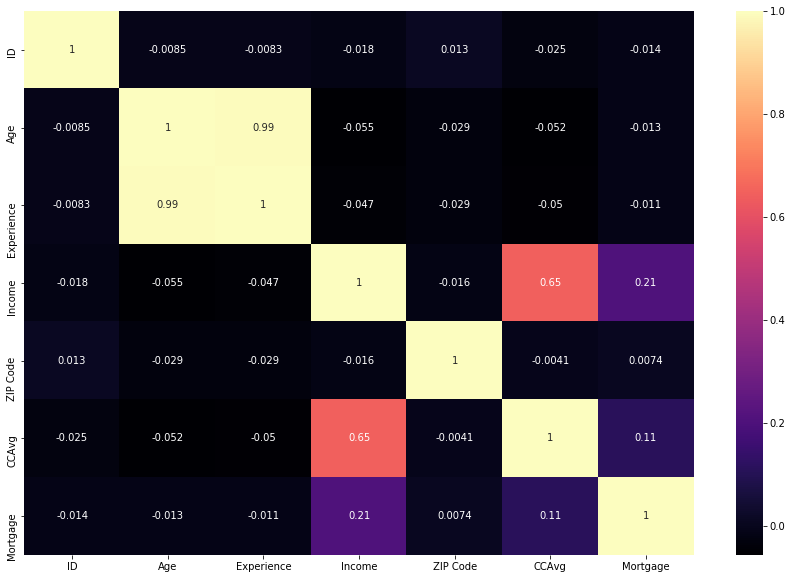

In [8]:
bank_corr=bank_df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="magma",annot=True)

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


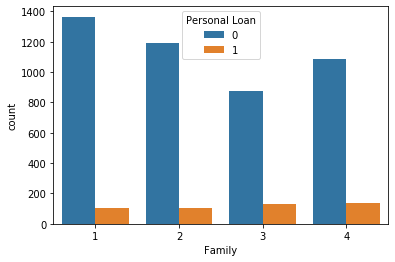

In [9]:
#Family
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=bank_df,hue='Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


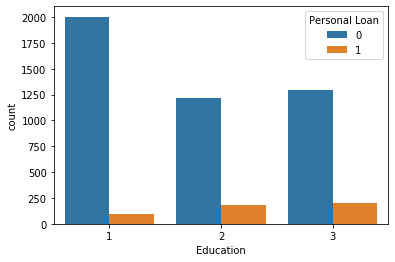

In [10]:
#Education
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=bank_df,hue='Personal Loan')

0    4520
1     480
Name: Personal Loan, dtype: int64


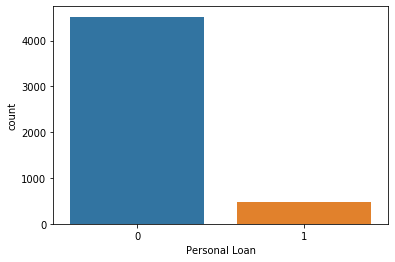

In [11]:
#Personal Loan
print(bank_df['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=bank_df)

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


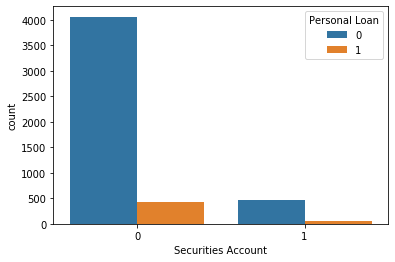

In [12]:

#Securities Account
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=bank_df,hue='Personal Loan')

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


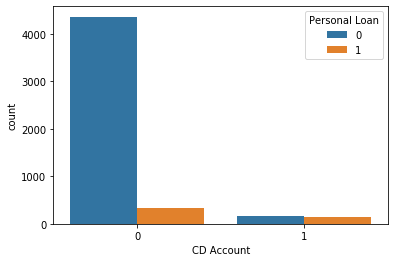

In [13]:
#CD Account
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


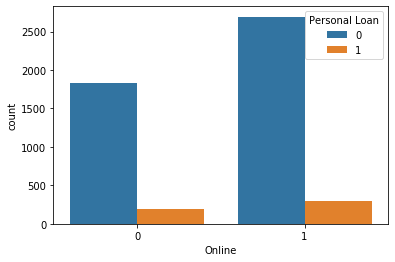

In [14]:
#Online
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=bank_df,hue='Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


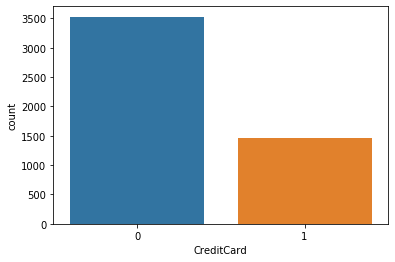

In [15]:
#CreditCard
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=bank_df)

In [16]:
bank_df=bank_df.drop(['ID'],axis=1)

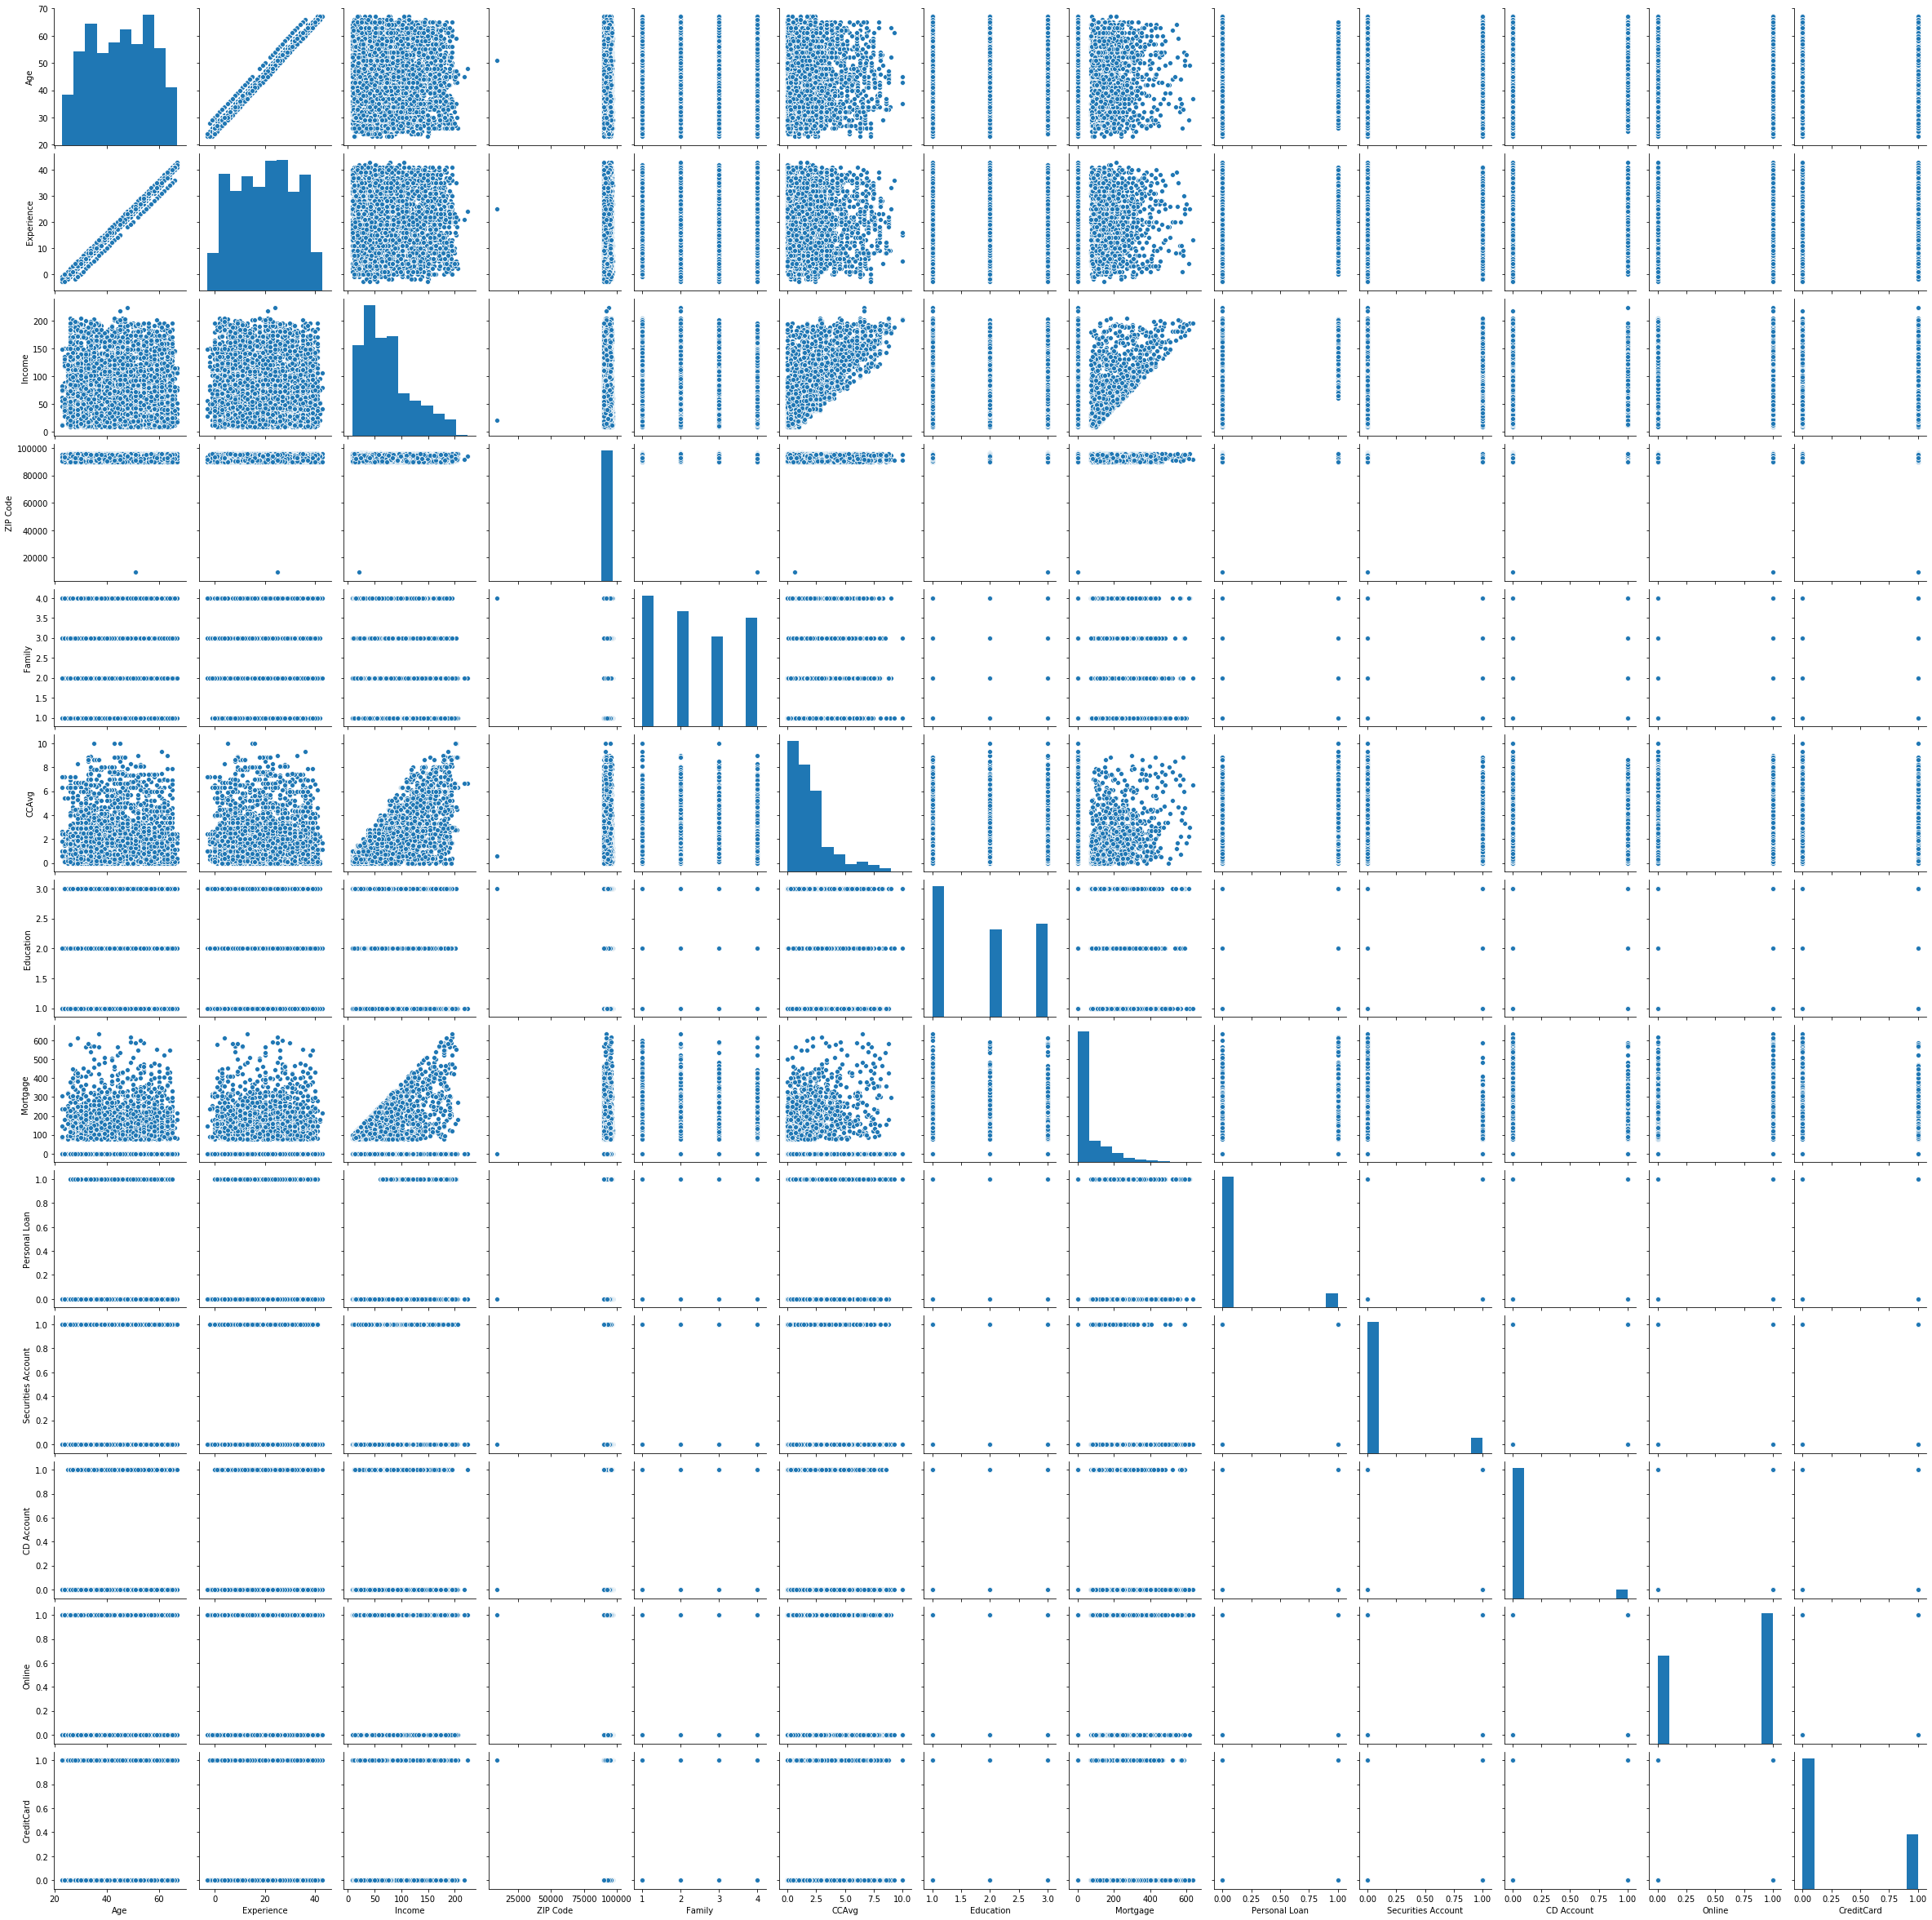

In [17]:
#plt.figure(figsize = (20,20))
sns.pairplot(bank_df)

In [18]:
bank_df.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


In [19]:
#1.We see -3 as experience, need to inspect these values.
#2.Income values are skewed.
#3.Mortgage col can be ignored as in most cases house is not mortgaged.
#4.Zip code is related to area, hence ignoring it for now
#5.Above a level og income people have taken personal loan, lower income group dont take a loan, so believe we can
#income.
#6.Data of personal loan is overlaped wrt to most variables.
#7.As per given statement only 480 took Personal Loan out of 5000, this is evident in the data.

In [20]:
#52 records have Experience less than zero, this is an error 
bank_df[bank_df['Experience']<0].shape

(52, 13)

In [21]:
#Taking absolute value of Experience column, to remove negative values
bank_df['Experience']=abs(bank_df['Experience'])

In [22]:
bank_df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [23]:

print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Age',aggfunc=['mean','median']))

                    mean median
                     Age    Age
Personal Loan                  
0              45.367257     45
1              45.066667     45


In [24]:
#Experience
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Experience',aggfunc=['mean','median']))

                    mean     median
              Experience Experience
Personal Loan                      
0              20.165487         20
1              19.843750         20


In [25]:
#Income, it shows variation to those who took personal loan and those who do not. 
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Income',aggfunc=['mean','median']))

                     mean median
                   Income Income
Personal Loan                   
0               66.237389   59.0
1              144.745833  142.5


In [26]:
#CCAvg, CCAvg spend is higher incase of personal Loan takers.
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='CCAvg',aggfunc=['mean','median']))

                   mean median
                  CCAvg  CCAvg
Personal Loan                 
0              1.729009    1.4
1              3.905354    3.8


In [27]:
#Mortgage
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Mortgage',aggfunc=['mean','max']))

                     mean      max
                 Mortgage Mortgage
Personal Loan                     
0               51.789381      635
1              100.845833      617


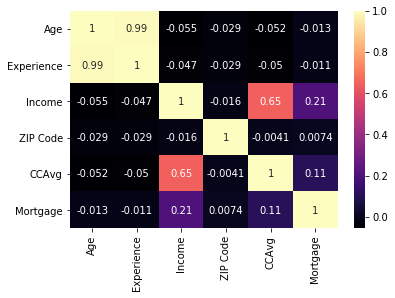

In [28]:
bank_corr=bank_df.corr()
sns.heatmap(bank_corr,cmap="magma",annot=True)

In [29]:
#Experience and age have very high correlation value, which is expected. 
#Income and CCAvg spend also have a strong correlation valu

In [30]:
bank_df.groupby(['Personal Loan']).agg(['mean','median'])

Age        Experience             Income         \
                    mean median       mean median        mean median   
Personal Loan                                                          
0              45.367257     45  20.165487     20   66.237389   59.0   
1              45.066667     45  19.843750     20  144.745833  142.5   

                   ZIP Code            CCAvg           Mortgage         
                       mean median      mean median        mean median  
Personal Loan                                                           
0              93152.428761  93437  1.729009    1.4   51.789381      0  
1              93153.202083  93407  3.905354    3.8  100.845833      0

In [31]:
bank_df.groupby(['Personal Loan']).agg(['min','max'])


Age     Experience     Income      ZIP Code        CCAvg        \
              min max        min max    min  max      min    max   min   max   
Personal Loan                                                                  
0              23  67          0  43      8  224     9307  96651   0.0   8.8   
1              26  65          0  41     60  203    90016  96008   0.0  10.0   

              Mortgage       
                   min  max  
Personal Loan                
0                    0  635  
1                    0  617

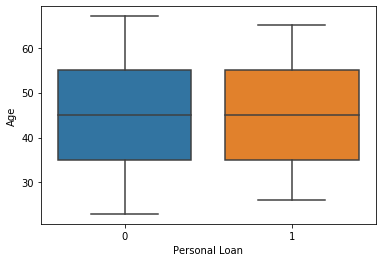

In [32]:
sns.boxplot(x='Personal Loan',y='Age',data=bank_df)

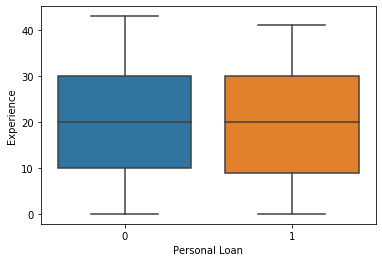

In [33]:
sns.boxplot(x='Personal Loan',y='Experience',data=bank_df)

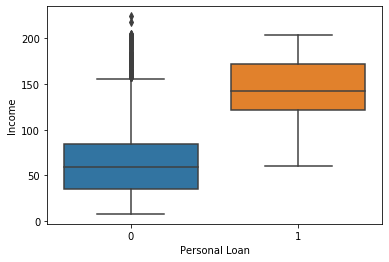

In [34]:
sns.boxplot(x='Personal Loan',y='Income',data=bank_df)

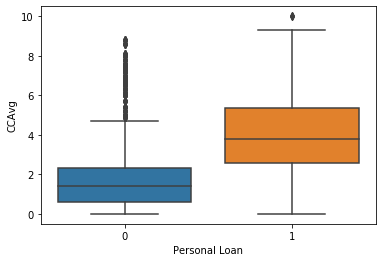

In [35]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=bank_df)

In [36]:
#Creating family dummy Variables
fa = pd.get_dummies(bank_df['Family'], prefix='Family')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_df,fa], axis=1)

In [37]:
#Creating education dummy Variables
ed = pd.get_dummies(bank_df['Education'], prefix='Education')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_df1,ed], axis=1)

In [38]:
# We have created dummies for the below variables, so we can drop them
##bank_df2 is our new dataset after cleaning and transformation
bank_df2=bank_df1.drop(['Education','Family'],1)

In [39]:
var=['Securities Account','CD Account','Online','CreditCard']
bank_df2[var]=bank_df2[var].astype('int64')

In [40]:
bank_df2_X = bank_df2.drop(['Personal Loan'], axis=1)
X = bank_df2.drop(['Personal Loan'], axis=1)
y = bank_df2['Personal Loan']

In [41]:
X.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

In [42]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_df2_X, y, train_size=0.7, test_size=0.3, random_state=100)

In [43]:
#Feature Scaling library
from sklearn.preprocessing import StandardScaler

In [44]:
#Applying Scaling to training set
scaler = StandardScaler()
X_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg']])
X_test[['Age','Experience','Income','CCAvg']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg']])

In [45]:
#ITERATION 1 - Fitting all the features in the first iteration
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.106272
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.654      
Dependent Variable:  Personal Loan    AIC:              775.9029   
Date:                2020-04-27 11:51 BIC:              874.4712   
No. Observations:    3500             Log-Likelihood:   -371.95    
Df Model:            15               LL-Null:          -1075.0    
Df Residuals:        3484             LLR p-value:      8.1329e-291
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                 -0.0555   0.9058 -0.0613 0.9512 -1.8309  1.7199
Experience           0.2542   0.9010  0.

In [46]:
#dropping Family_2 and Education_1 in iteration 2 as they have high p value
X_train1 = X_train.drop(['Family_2','Education_1'], axis=1)

In [47]:
#ITERATION 2
logit_model=sm.Logit(y_train,X_train1)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              786.0626   
Date:                2020-04-27 11:51 BIC:              878.4704   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            14               LL-Null:          -1075.0    
Df Residuals:        3485             LLR p-value:      3.3044e-289
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0389   0.8931  -0.0436 0.9652 -1.7894  1.7115
Experience          0.2218   0.8877   0.

In [48]:
#dropping Experience as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)


#ITERATION 9
logit_model=sm.Logit(y_train,X_train1)
result9=logit_model.fit()
print(result9.summary2())

Optimization terminated successfully.
         Current function value: 0.240180
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.218     
Dependent Variable:   Personal Loan    AIC:              1697.2579 
Date:                 2020-04-27 11:51 BIC:              1746.5421 
No. Observations:     3500             Log-Likelihood:   -840.63   
Df Model:             7                LL-Null:          -1075.0   
Df Residuals:         3492             LLR p-value:      4.2152e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              1.2499   0.0659  18.9748 0.0000  1.1208  1.3790
Securities Account -1.7785   0.2647  -6.7

In [73]:

##Now all the features are significant. Selecting these variables to predict the result

In [72]:
from sklearn.linear_model import LogisticRegression  # Analysis using logisic regression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#Fitting the model on test data
X_test1 = X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)
X_test1.columns

Index(['Income', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Family_1', 'Family_3', 'Family_4'],
      dtype='object')

In [51]:
y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1317   25]
 [  81   77]]


In [53]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=77
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1317
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=25
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=81

Accuracy of logistic regression classifier on test set: 92.93%
Misclassification Rate: It is often wrong: 7.07%
Sensitivity: When its actually yes how often it predicts yes: 48.73%
Specificity: When its actually no, how often does it predict no: 98.14%
Precision: When it predicts yes, how often is it correct: 75.49%


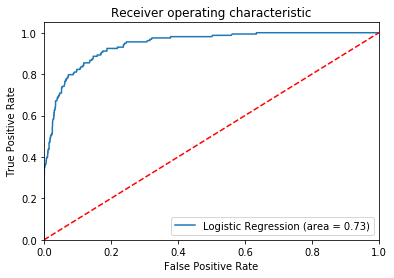

In [54]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [55]:
#Sensitivity value is too low, this may be due to data we have. Which contains only 480 records which are 
#yes it seems model needs more data to train itself.

#Specificity seems fine

#Trying new model K nearest neighbour to check if we could improve the results.

#More the area under ROC better the model performs, its 0.73 in this case. Model is ok be lets see if this could be 
#improved further specially Sesitivity

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1342
           1       0.75      0.49      0.59       158

    accuracy                           0.93      1500
   macro avg       0.85      0.73      0.78      1500
weighted avg       0.92      0.93      0.92      1500



In [57]:
y_pred_1 = pd.DataFrame(y_pred)
y_pred_1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [58]:
from sklearn.neighbors import KNeighborsClassifier   # KNN clasifier 

In [59]:
#Using X_train dataframe as it was final data after cleaning, apply scaling and splitting


In [60]:
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)


In [62]:
NNH.score(X_test, y_test)

0.894

In [63]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))


[[1328   14]
 [ 145   13]]


In [64]:
#Iteration 1:Using same features as derived in above Logistic model, we perofrmance getting improved
X_KNN_train1 = X_train.drop(['Age'],axis=1)
#                         'ZIP Code','CCAvg','Family_2','Education_1','Age','Mortgage'], axis=1)

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH1.fit(X_train1, y_train)

X_KNN_test1 = X_test.drop(['Age'],axis=1)
predicted_labels_KNN = NNH1.predict(X_test1)

NNH1.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1324   18]
 [  68   90]]


Accuracy of logistic regression classifier on test set: 94.27%
Misclassification Rate: It is often wrong: 5.73%
Sensitivity: When its actually yes how often it predicts yes: 56.96%
Specificity: When its actually no, how often does it predict no: 98.66%
Precision: When it predicts yes, how often is it correct: 83.33%


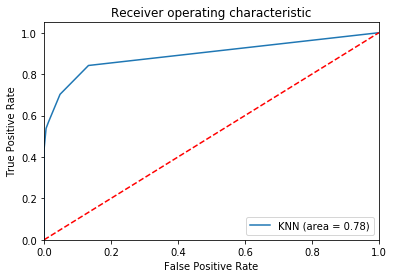

In [65]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=90
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1324
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=18
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=68

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, NNH1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [66]:
from sklearn.naive_bayes import GaussianNB

[[1253   89]
 [  56  102]]
Accuracy of logistic regression classifier on test set: 90.33%
Misclassification Rate: It is often wrong: 9.67%
Sensitivity: When its actually yes how often it predicts yes: 64.56%
Specificity: When its actually no, how often does it predict no: 93.37%
Precision: When it predicts yes, how often is it correct: 53.40%


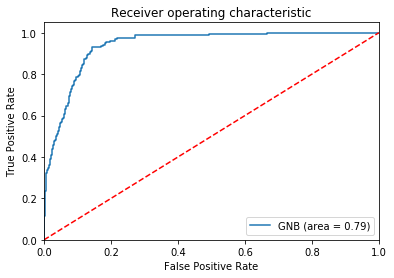

In [67]:
#Iteration 1 - Fitting all variables, cleaned and normalized data
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

GNB1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=102
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1253
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=89
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=56


Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [68]:
#Chossing the best of all 3 models and below are there results:

#Model	  Results									                                      Matrix
#Logistic Accuracy of logistic regression classifier on test set:            92.93%		 [[1317   25]
#	      Misclassification Rate:It is often wrong:                           7.07%		  [  81   77]]
#	      Sensitivity: When its actually yes how often it predicts yes:      48.73%
#	      Specificity: When its actually no, how often does it predict no:   98.14%
#	      Precision: When it predicts yes, how often is it correct:          75.49%
#	

#KNN	  Accuracy on test set:                                              94.80%		 [[1330   12]
#	      Misclassification Rate: It is often wrong:                          5.20%		  [  66   92]]
#	      Sensitivity: When its actually yes how often it predicts yes:      58.23%
#	      Specificity: When its actually no, how often does it predict no:   99.11%
#	      Precision: When it predicts yes, how often is it correct:          88.46%
#	
#GNB	  Accuracy of test set :                                             90.33%		 [[1253   89]
#	      Misclassification Rate: It is often wrong:                          9.67%		  [  56  102]]
#	      Sensitivity: When its actually yes how often it predicts yes:      64.56%
#	      Specificity: When its actually no, how often does it predict no:   93.37%
#	      Precision: When it predicts yes, how often is it correct:          53.40%

In [69]:
#KNN model performs the best, evident from above results. However, Sensitivity is greater in GNB.
#The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 88% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#Though our Sensitivity is around 58% still we end up offering more loans at end of program